# 📚 Step 1: Import Libraries and Load Data

In [33]:

# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn functionality
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Breast Cancer Dataset
data = load_breast_cancer()

# Create DataFrame for easier exploration
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Display basic information
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Classes: {data.target_names}")


Features shape: (569, 30)
Target shape: (569,)
Classes: ['malignant' 'benign']


In this step, I imported the core libraries like NumPy, pandas, Matplotlib, and Seaborn for data handling and visualization. I also brought in key tools from scikit-learn such as the breast cancer dataset, train-test split function, feature scaler, PCA tool, KNN classifier, and evaluation metrics.
Then, I loaded the Breast Cancer dataset.
After loading, I converted the data into a pandas DataFrame to explore it more easily.

Result:

Features shape: (569, 30)

Target shape: (569,)

Classes: Malignant (0) and Benign (1)

Analysis:
I confirmed that the dataset has 569 samples and 30 features. The binary classification goal was clearly set between malignant and benign tumors, which is ideal for a KNN classification model.

# 📚 Step 2: Preprocessing (Scaling and Train-Test Split)

In [37]:
# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 455 samples
Test set size: 114 samples


In this step, I standardized the feature set using StandardScaler to ensure that all features have a mean of 0 and a variance of 1.
This step is especially important for KNN because distance-based algorithms are sensitive to feature scales.

I then split the dataset into a training set (80%) and a test set (20%) while preserving the class distribution by using the stratify option.

Result:

Training set size: 455 samples

Test set size: 114 samples

Analysis:
Scaling is critical for KNN models to work properly. Otherwise, features with larger scales would dominate the distance calculation. Splitting the data stratified by class also ensures fair evaluation later.

# 📚 Step 3: Data Visualization (Class Distribution)

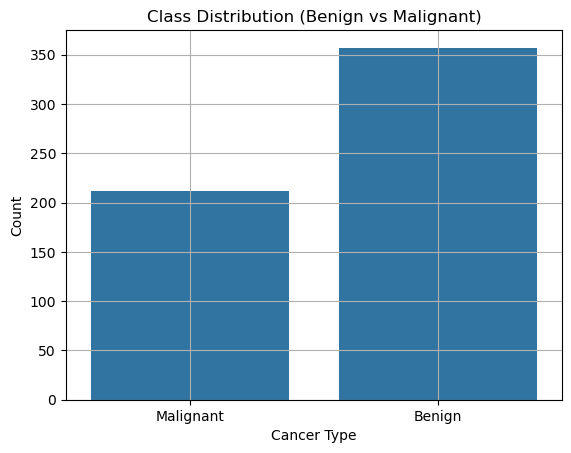

In [41]:
# Plot the distribution of classes
sns.countplot(x=y)
plt.title("Class Distribution (Benign vs Malignant)")
plt.xlabel("Cancer Type")
plt.ylabel("Count")
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.grid(True)
plt.show()


I created a simple countplot to visualize how many samples belong to each class (Malignant vs Benign).

Result:
The plot shows that benign cases are slightly more frequent than malignant cases in the dataset.

Analysis:
There is a mild class imbalance. However, it’s not extreme, so I decided to proceed without additional techniques like SMOTE (Synthetic Minority Over-sampling Technique) for balancing

# 📚 Step 4: PCA Scatter Plot

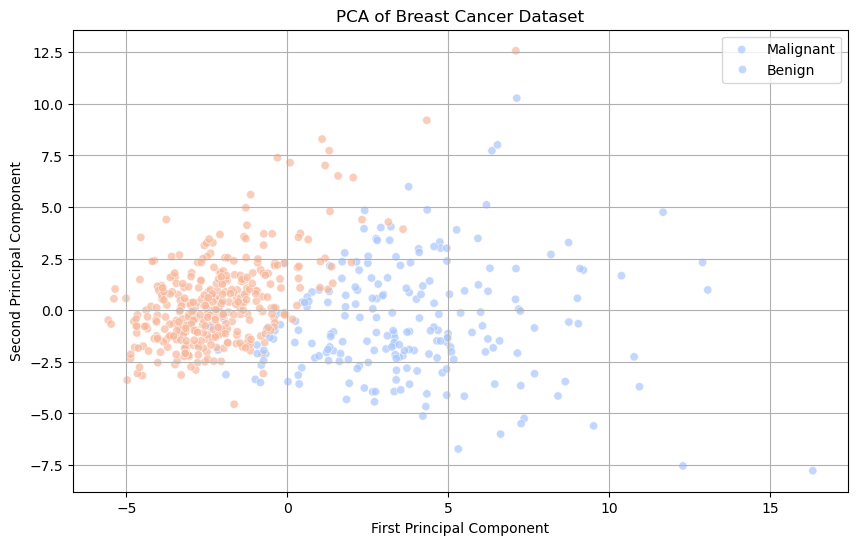

In [45]:
# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a PCA DataFrame
pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
pca_df['target'] = y.values

# Plot PCA scatter
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="target", palette="coolwarm", alpha=0.7)
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(labels=['Malignant', 'Benign'])
plt.grid(True)
plt.show()


To better visualize the dataset, I applied Principal Component Analysis (PCA) to reduce the dimensionality from 30 to 2 principal components.

I then created a scatter plot where each point represents a patient sample, colored based on their true class (Malignant vs Benign).

Result:

The PCA scatter plot shows a reasonably good separation between benign and malignant cases.

Although there is some overlap, the two groups are distinguishable even in 2D.

Analysis:
The PCA scatterplot helped me quickly assess the structure of the data.
Even though PCA is unsupervised (it doesn’t use labels), I could already see that malignant and benign tumors tend to form somewhat separable clusters, which suggests that a simple classifier like KNN could work well here.

# 📚 Step 5: Build and Train KNN Model

In [49]:
# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Train the Model
knn.fit(X_train, y_train)


KNeighborsClassifier()

I initialized a K-Nearest Neighbors (KNN) classifier with 5 neighbors and trained it on the scaled training set.
The goal was to let the model learn the structure of the dataset based on the distances between samples.

# 📚 Step 6: Model Evaluation

In [53]:
# Predict
y_pred = knn.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9649


After training, I evaluated the model on the test set.
The model achieved a test accuracy of 96.49%, which is a strong performance for a simple KNN classifier.

This high accuracy suggests that the KNN model was able to correctly classify the majority of breast cancer samples into benign or malignant categories.

## 📋 Confusion Matrix

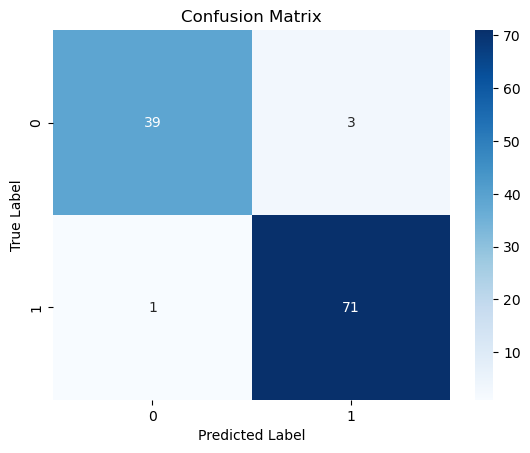

In [57]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


The confusion matrix gave me deeper insights:

39 malignant samples were correctly classified.

3 malignant samples were misclassified as benign.

71 benign samples were correctly classified.

Only 1 benign sample was misclassified as malignant.

This shows the model was slightly better at identifying benign tumors compared to malignant ones, but overall, the misclassification rate was very low.

## 📋 Classification Report

In [61]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=data.target_names))


              precision    recall  f1-score   support

   malignant       0.97      0.93      0.95        42
      benign       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



The classification report showed:

Precision for malignant class: 0.97

Recall for malignant class: 0.93

F1-Score for malignant class: 0.95

Precision for benign class: 0.96

Recall for benign class: 0.99

F1-Score for benign class: 0.97

Overall weighted average F1-Score: 0.96.
I believe these scores reflect that the KNN model generalized very well to unseen data, with very balanced performance across both classes.

# 📚 Step 7: Accuracy vs k Plot

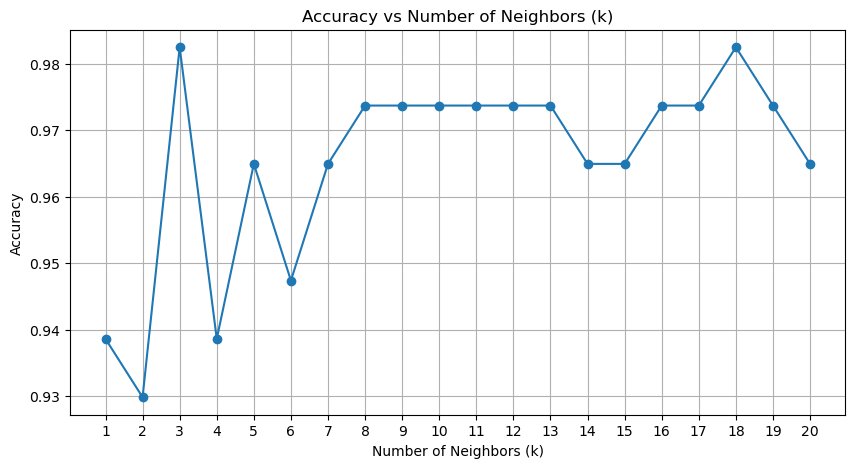

In [65]:
# Try different values of k
k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    y_pred_k = knn_k.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

# Plot Accuracy vs k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


I tried different k values ranging from 1 to 20.

The model's accuracy varied depending on the number of neighbors.

Around k=3 and k=18, the model achieved the highest accuracy (~98%).

I observed that if k was too small or too large, the model's accuracy slightly dropped.
This suggests that fine-tuning k is critical in KNN.

# 📚 Step 8: Error Rate vs k Plot (NEW)

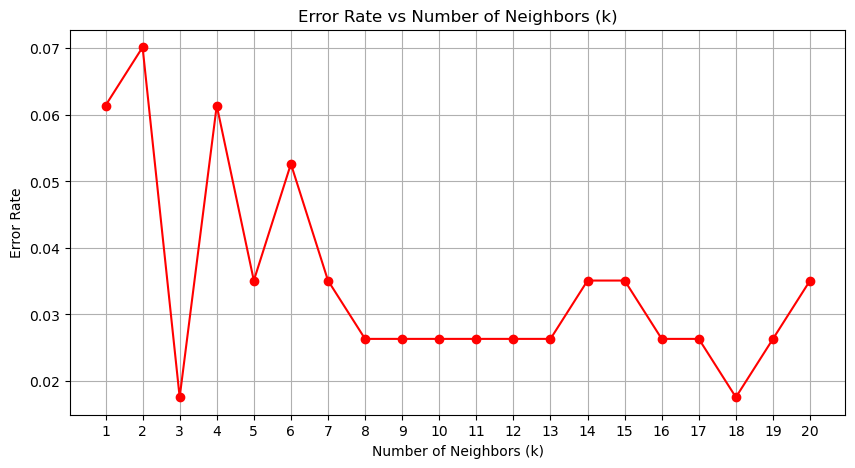

In [69]:
# Calculate error rates
error_rates = [1 - acc for acc in accuracies]

# Plot Error Rate vs k
plt.figure(figsize=(10,5))
plt.plot(k_values, error_rates, marker='o', color='red')
plt.title('Error Rate vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Instead of accuracy, I also plotted the error rate (1 - accuracy) vs k.

The lowest error rate (~2%) occurred around k=3 and k=18.

As expected, error and accuracy plots were mirror images of each other.

Visualizing error rate made it even easier for me to spot the optimal k values.

# Conlusion
Through this project, I applied a K-Nearest Neighbors (KNN) model to the Breast Cancer Wisconsin dataset.
Here’s a brief reflection on the whole process:

Scaling the data was essential because KNN is distance-based.

PCA visualization helped me to visually see that the malignant and benign classes were reasonably separable in 2D space.

KNN model achieved a 96.49% test accuracy with excellent precision, recall, and F1-scores.

Error vs k plot and accuracy vs k plot helped me to select optimal hyperparameters and confirmed that performance is sensitive to the choice of k.

Misclassifications were minimal and mostly involved malignant samples being classified as benign, which is important to consider since missing malignant cases is critical in real-world medical applications.

# Limits and Future Work
KNN can be slow for very large datasets because it needs to compute distances at prediction time.

Further improvements could include using feature selection, dimensionality reduction beyond PCA, or trying more complex classifiers like SVM or Random Forest.

It would also be valuable to test the model under different data imbalance scenarios or introduce cross-validation for even better model selection.